# Generate data

##### Imports

In [ ]:
import numpy as np
import scipy.signal
from scipy.stats import poisson
import sklearn.linear_model

##### Data_0: Time-series + PSD

In [166]:
f_sample = 1000
T = 30

N = f_sample * T
t = np.linspace(0, T, N) # 30 seconds of data sampled at 1000 Hz

f = np.fft.fftfreq(N, 1./f_sample)[:N/2+1]

y_t = 1*scipy.signal.square(2*np.pi*.25*t, duty = .5) + .5*np.random.normal(0,5,N)
y_f = np.fft.rfft(y_t).real
S_f = y_f*y_f

In [ ]:
x_0 = t
x_0_inset = f
y_0 = y_t
y_0_inset = S_f

##### Data_1: Scatter plot w/ contours

In [33]:
# Data points
mu_x = -2
mu_y = 5

sigma_x = 5.
sigma_y = 10.

A_x = 1./np.sqrt(2*sigma_x**2.*np.pi)
A_y = 1./np.sqrt(2*sigma_y**2.*np.pi)

x = np.random.normal(mu_x, sigma_x, 100)      # Normally distributed x-values
y = np.random.normal(mu_y, sigma_y, 100)     #    ""         ""     y-values

X = np.linspace(mu_x-10*sigma_x, mu_x+10*sigma_x, 1000)
Y = np.linspace(mu_y-10*sigma_y, mu_y+10*sigma_y, 1000)
Z = np.empty((X.shape[0], Y.shape[0]))
for i in range(X.shape[0]):
    for j in range(Y.shape[0]):
        Z[i,j] = A_x*A_y*np.exp(-((X[i]-mu_x)**2./(2*sigma_x**2.)+(Y[j]-mu_y)**2./(2*sigma_y**2.)))

In [43]:
x_1_0 = x
y_1_0 = y
x_1_1 = X
y_1_1 = Y
z_1_1 = Z
c_1 = c

##### Data_2: Poisson distributions with varying means

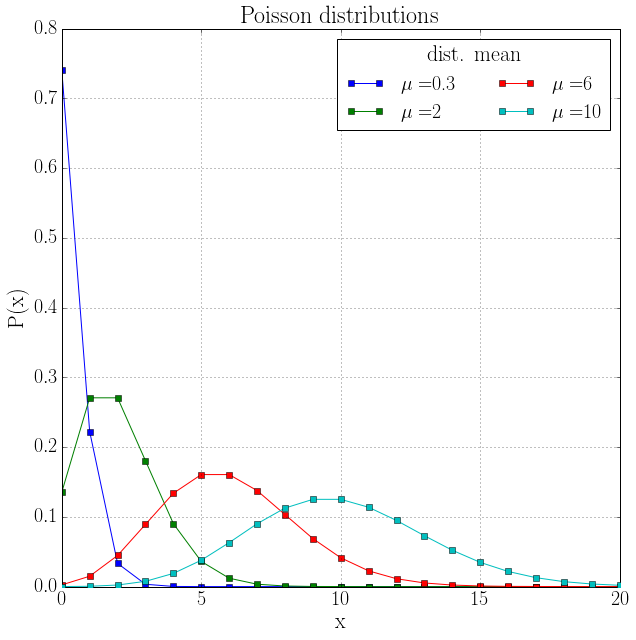

In [49]:
x = np.arange(0,500)

y_poisson = []
for i, mu_poisson in enumerate([.3, 2, 6, 10]):
    y_poisson.append(poisson.pmf(x, mu_poisson))

In [50]:
x_2 = x
y_2_0 = y_poisson[0]
y_2_1 = y_poisson[1]
y_2_2 = y_poisson[2]
y_2_3 = y_poisson[3]

##### Data_3: Sine-wave data w/ fit using regularized linear regression

In [171]:
N = 50
x_train = 150*np.random.rand(N).reshape(-1,1)
a = 3
b = 2
c = .2
y = np.array([np.sin(.05*x_train[i] + np.pi/3) for i in range(x_train.shape[0])])
y = y.reshape(-1,1)
error = np.array([np.random.normal(0, .05, 1) for i in range(x_train.shape[0])]).reshape(-1,1)
y_train = y + error


num_features = 20
X_train = np.empty((x_train.shape[0], num_features))
for i in range(X_train.shape[0]):
    for j in range(0, X_train.shape[1]):
        X_train[i,j] = x_train[i,0]**(j+1)
        
x = np.linspace(0,150,1000).reshape(-1,1)

mod_noreg = sklearn.linear_model.LinearRegression()
mod_noreg.fit(X_train, y_train)
y_pred_noreg = np.array([mod_noreg.intercept_[0] + sum(mod_noreg.coef_[i]*x[j,0]**(i+1)\
                                                            for i in range(mod_noreg.coef_.shape[0])) for j in range(x.shape[0])])

alpha = 1
mod_reg = sklearn.linear_model.Lasso(alpha = alpha)
mod_reg.fit(X_train, y_train)
y_pred_reg = np.array([mod_reg.intercept_[0] + sum(mod_reg.coef_[i]*x[j,0]**(i+1)\
                                                        for i in range(mod_reg.coef_.shape[0])) for j in range(x.shape[0])])

In [104]:
x_3_0 = x_train
y_3_0 = y_train
x_3_1 = x
y_3_1 = y_pred_reg

# Generate figure

##### Imports

In [128]:
import matplotlib.pyplot as plt
%matplotlib inline
import mpl_toolkits.axes_grid.inset_locator as mpl_tools

##### Cosmetic variables

In [ ]:
# Text sizes
suptitle_size = 36
title_size = 24
axislabel_size = 22
axistick_size = 20
legendtitle_size = 22
legendlabel_size = 20
label_size = 20

# Colors
p_black = np.array([60, 60, 60])/255.
p_gray = np.array([120, 120, 120])/255.
p_red = np.array([214, 95, 95])/255.
p_green = np.array([106, 204, 101])/255.
p_blue = np.array([72, 120, 207])/255.
p_yellow = np.array([196, 173, 102])/255.
p_purple = np.array([180, 124, 199])/255.

##### Create the figures

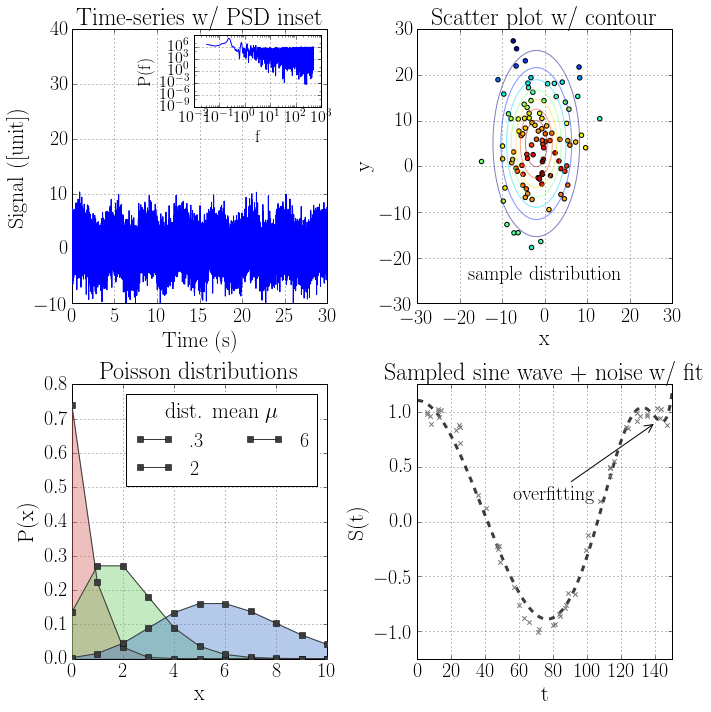

In [170]:
# Create plot environment
fig, ax = plt.subplots(2, 2, figsize = (10,10))

# Plot 0 (top left)
fig.sca(ax[0,0])

plt.plot(x_0, y_0, zorder = 3)

plt.ylim(-10, 40)

plt.title('Time-series w/ PSD inset', size = title_size)
plt.xlabel('Time (s)', size = axislabel_size)
plt.ylabel('Signal ([unit])', size = axislabel_size)
plt.tick_params(labelsize = axistick_size)
plt.grid()

# Plot 0 (inset)
l_0, h_0, w_0, h_0 = 0, 0.4, 0.2, 0.2

ax_0_in = mpl_tools.inset_axes(ax[0,0], width = '50%', height = 1.0, loc = 1)
plt.sca(ax_0_in)

plt.loglog(x_0_inset, y_0_inset, zorder = 3)

plt.xlabel('f', size = axislabel_size*.8)
plt.ylabel('P(f)', size = axislabel_size*.8)
plt.tick_params(labelsize = axistick_size*.8)
plt.yticks([1e-9, 1e-6, 1e-3, 1e-0, 1e3, 1e6])
plt.grid()


# Plot 1 (top right)
fig.sca(ax[0,1])

plt.scatter(x_1, y_1, c = c_1, zorder = 3)
plt.contour(X_1, Y_1, Z_1, zorder = 3, alpha = .5)
plt.text(0, -25, 'sample distribution', size = label_size, rotation = 0, ha = 'center')

plt.xlim(-30, 30)
plt.ylim(-30, 30)

plt.title('Scatter plot w/ contour', size = title_size)
plt.xlabel('x', size = axislabel_size)
plt.ylabel('y', size = axislabel_size)
plt.tick_params(labelsize = axistick_size)
plt.grid()

# Plot 2 (bottom left)
fig.sca(ax[1,0])


plt.plot(x_2, y_2_0, color = p_black, marker = 's', zorder = 3, label = r'.3')
plt.fill_between(x_2, y_2_0, color = p_red, alpha = .4, zorder = 3)

plt.plot(x_2, y_2_1, color = p_black, marker = 's', zorder = 3, label = r'2')
plt.fill_between(x_2, y_2_1, color = p_green, alpha = .4, zorder = 3)

plt.plot(x_2, y_2_2, color = p_black, marker = 's', zorder = 3, label = r'6')
plt.fill_between(x_2, y_2_2, color = p_blue, alpha = .4, zorder = 3)



plt.xlim(0,10)

plt.title('Poisson distributions', size = title_size)
plt.xlabel('x', size = axislabel_size)
plt.ylabel('P(x)', size = axislabel_size)
plt.tick_params(labelsize = axistick_size)


leg = plt.legend(title = 'dist. mean $\mu$', loc = 'upper right', fontsize = legendlabel_size, ncol = 2)
leg.get_title().set_fontsize(legendtitle_size)
plt.grid()



# Plot 3 (bottom right)
fig.sca(ax[1,1])

plt.scatter(x_3_0, y_3_0, marker = 'x', zorder = 3, color = p_gray)
plt.plot(x_3_1, y_3_1, lw = 3, ls = '--', color = p_black)
plt.annotate('overfitting', xy = (140, .9), xycoords = 'data', xytext = (80, .25),\
             textcoords = 'data', ha = 'center', va = 'center', fontsize = label_size,\
             arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3'))

plt.xlim(np.min(x_3_1), np.max(x_3_1))
plt.ylim(-1.25, 1.25)

plt.title('Sampled sine wave + noise w/ fit', size = title_size)
plt.xlabel('t', size = axislabel_size)
plt.ylabel('S(t)', size = axislabel_size)
plt.tick_params(labelsize = axistick_size)
plt.grid()



fig.tight_layout()

plt.savefig('./file_name.png', dpi = 300)
plt.show()